In [58]:
import jax
import jax.numpy as jnp
import jax.random as jr

import hugegp as hg

import matplotlib.pyplot as plt

key = jr.key(13)

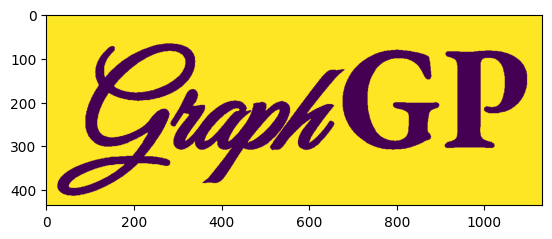

In [60]:
img = plt.imread("/mnt/c/Users/dodge/Downloads/graphgp.png")
plt.imshow(img[...,0] == 1)
plt.show()

In [64]:
coords = jnp.array(jnp.meshgrid(
    jnp.arange(img.shape[0]),
    jnp.arange(img.shape[1]),
    indexing="ij",
)).reshape(2, -1).T / 100

letter = jnp.flatnonzero(img[...,0] == 0)

points = coords[letter]
points = jnp.roll(points, 1, axis=1)
points = points.at[:, 1].mul(-1)
len(points)

90974

In [158]:
graph = hg.build_strict_graph(points, n_initial=300, k=8)
covariance = hg.matern_cov_discretized(r_min=1e-3, r_max=20, n_bins=200, cutoff=0.15)

In [159]:
key, k1 = jr.split(key)
xi = jr.normal(k1, (len(points),))
values = hg.generate(graph, covariance, xi, cuda=True)

In [ ]:
plt.figure(dpi=300)
plt.scatter(*points.T, c=values, s=.1, cmap='summer', vmin=-3, vmax=4)
plt.gca().set(aspect='equal')
plt.axis('off')
plt.savefig('logo.png', bbox_inches='tight', transparent=True, pad_inches=0, dpi=300)
plt.show()